In [1]:
cd ..

/home/dmitriishubin/Desktop/Projects/mask


In [2]:
import pyvista as pv
from pyvista import examples
import numpy as np
import copy
import cv2
from time import time
import matplotlib.pyplot as plt

import pyvista as pv
import vtk

In [3]:
def trans_to_matrix(trans):
    """Convert a numpy.ndarray to a vtk.vtkMatrix4x4 """
    matrix = vtk.vtkMatrix4x4()
    for i in range(trans.shape[0]):
        for j in range(trans.shape[1]):
            matrix.SetElement(i, j, trans[i, j])
    return matrix

In [119]:
mesh = pv.read("./data/3d_models/putin/putin.OBJ")
tex = pv.read_texture("./data/3d_models/putin/color.png")

#center and scale
points = mesh.extract_feature_edges()
points = points.points
mesh.translate(-1*np.mean(points,axis=0))

points = mesh.extract_feature_edges()
points = points.points
mesh.scale(1/np.max(np.abs(points)))

axes = pv.Axes(show_actor=True, actor_scale=2.0, line_width=5)


#mesh.plot(cpos='xy', jupyter_backend='ipygany', show_scalar_bar=True)
#mesh.plot(cpos='xy', jupyter_backend='ipygany', show_scalar_bar=True)


poly = pv.PolyData(np.array([[-0.01, 0.125, 0.5], [-0.01, 0.125, -0.5]]))
#poly.plot(eye_dome_lighting=True)
#poly.plot(cpos='xy', jupyter_backend='ipygany', show_scalar_bar=True)

mesh.rotate_x(0, point=axes.origin)
poly.rotate_x(0, point=axes.origin)

/home/dmitriishubin/anaconda3/envs/mask/lib/python3.7/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


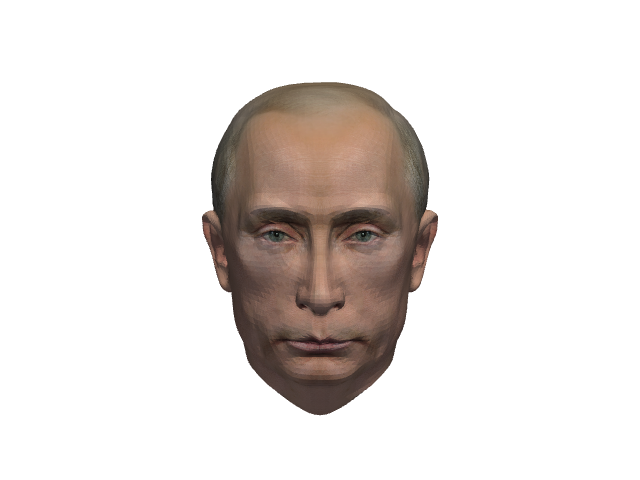

2.7625511107364162


In [120]:


camera = pv.Camera()
camera.position = [0, 0, 10]



#camera.direction = (0, 0, 0)

near_range = 0.1
far_range = 10
camera.clipping_range = (near_range, far_range)
camera.view_angle = 16

modelTransform = np.array([
 [  1.,   0.,   0.,  -0.],
   [  0.,   1.,   0.,  -0.],
   [  0.,   0.,   1., -10.],
   [  0.,   0.,   0.,   1.]
], dtype=np.float32)


projTransform = np.array([
  [ 5.3365273,  0.       ,  0.       ,  0.       ],
       [ 0.       ,  7.11537  ,  0.       ,  0.       ],
       [ 0.       ,  0.       , -1.       , -0.2      ],
       [ 0.       ,  0.       , -1.       ,  0.       ]]
, dtype=np.float32)

# camera.SetModelTransformMatrix(trans_to_matrix(modelTransform))
# camera.SetExplicitProjectionTransformMatrix(trans_to_matrix(projTransform))
# camera.SetUseExplicitProjectionTransformMatrix(1)



for i in range(20):
    start = time()
    
    pl = pv.Plotter(off_screen=True)
    pl.window_size =  640,480
    pl.background_color = (1,1,1)
    pl.camera = camera
    
    mesh_r = mesh.copy()

    #mesh_r.rotate_x(60, point=axes.origin)
    
    #mesh.rotate_z(60, point=axes.origin)

    pl.add_mesh(mesh,texture=tex)
    
    #pl.add_mesh(mesh,color=[0.2,0.2,0.2])
    
    
    
    
    
    pl.show()
    img = pl.image

    print(1/(time()-start))
    
    break

(array([1.11130e+04, 1.47040e+04, 1.41900e+04, 1.32260e+04, 1.43280e+04,
        1.70030e+04, 1.08670e+04, 1.33000e+03, 2.57000e+02, 8.24582e+05]),
 array([  5.,  30.,  55.,  80., 105., 130., 155., 180., 205., 230., 255.]),
 <BarContainer object of 10 artists>)

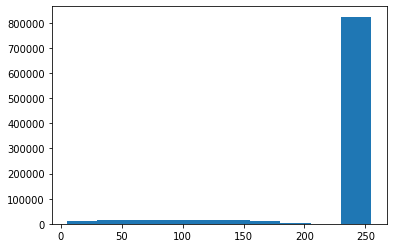

In [48]:
plt.hist(img.reshape(-1))

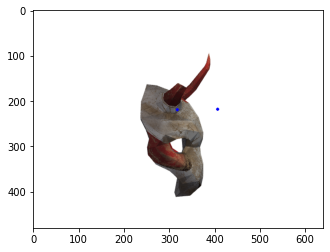

In [44]:
#img = np.transpose(img,(2,0,1))
img = np.ascontiguousarray(img, dtype=np.uint8)

# img = cv2.circle(img, (407, 218), radius=2, color=(0, 0, 255), thickness=2)
# img = cv2.circle(img, (318, 219), radius=2, color=(0, 0, 255), thickness=2)


plt.imshow(img)

In [ ]:
img.shape

In [ ]:
pl.camera.Ge()

In [ ]:
mtx = pl.camera.GetModelViewTransformMatrix()
mtx = pv.array_from_vtkmatrix(mtx)
mtx

In [ ]:
mtx = pl.camera.()
#mtx = pv.array_from_vtkmatrix(mtx)
mtx

In [ ]:
pl.camera.model_transform_matrix

In [ ]:
mtx = pl.camera.Ge
#mtx = pv.array_from_vtkmatrix(mtx)
mtx

In [ ]:
camera.model_transform_matrix

In [ ]:
camera.

In [ ]:
camera.model_transform_matrix

In [ ]:


points = mesh.extract_feature_edges()
points = points.points

In [177]:
import open3d as o3d

import yaml

config  =yaml.load(open('./config.yml'))



mesh = o3d.io.read_triangle_mesh("./data/3d_models/putin/putin.stl")
mesh.compute_vertex_normals()

mesh = mesh.translate(-1*np.mean(mesh.vertices,axis=0))
mesh = mesh.scale(
    1 / np.max(np.abs(np.asarray(mesh.vertices))), center=mesh.get_center()
)
mesh = mesh.translate((0,0,0))

mesh.paint_uniform_color([0.2,0.2,0.2])

pcd = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(
                                                        [[-0.3,0,0.615],[0.3,0,0.615]]
                                                        )
                             )

R = mesh.get_rotation_matrix_from_xyz((0,0, 0))
mesh.rotate(R, center=(0, 0, 0))
pcd.rotate(R,center=(0,0,0))

o3d.visualization.draw_geometries([mesh,pcd])


/home/dmitriishubin/anaconda3/envs/mask/lib/python3.7/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


In [ ]:
image.shape

In [ ]:
mask.render.scene.camera.get_view_matrix()

In [ ]:
o3d.visualization.draw_geometries([mesh])


In [ ]:
mesh.textures = o3d.geometry.Image(img)

In [ ]:
mesh.triangle_uvs = o3d.utility.Vector2dVector(img)
o3d.visualization.draw_geometries([mesh])